In [1]:
import os, sys, shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from glob import glob
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(os.getcwd())

/media/asus/working/git/Stomach-Status-Classification/Utils


In [3]:
os.chdir("..")
print(os.getcwd())

/media/asus/working/git/Stomach-Status-Classification


In [4]:
exper_dir = os.getcwd() + "/Experiment"
print(os.listdir(exper_dir))

['Training', 'Approach', 'README.md', 'DLApproach', 'Results bag of visual words-20221019T081806Z-001', 'Approach2-8']


In [5]:
approach_dir = exper_dir + "/Approach"
print(os.listdir(approach_dir))

['DecisionTree', 'LogisticRegression', 'all_model_analysis', 'SVM', 'HARDMSEG', 'RandomForest', 'ExtraTreeClassifier']


In [6]:
method = [x for x in os.listdir(approach_dir) if x not in ["HARDMSEG", "all_model_analysis"]]
print(method)

['DecisionTree', 'LogisticRegression', 'SVM', 'RandomForest', 'ExtraTreeClassifier']


In [7]:
method_dirs = [approach_dir + f"/{x}" for x in method]
method_dirs

['/media/asus/working/git/Stomach-Status-Classification/Experiment/Approach/DecisionTree',
 '/media/asus/working/git/Stomach-Status-Classification/Experiment/Approach/LogisticRegression',
 '/media/asus/working/git/Stomach-Status-Classification/Experiment/Approach/SVM',
 '/media/asus/working/git/Stomach-Status-Classification/Experiment/Approach/RandomForest',
 '/media/asus/working/git/Stomach-Status-Classification/Experiment/Approach/ExtraTreeClassifier']

In [8]:
print(os.listdir(method_dirs[0]))

['rdf_km256_surf50_result_fold10_0.9.pkl', 'dt_km_brisk_10cv_64.ipynb', 'dt_km_surf50_10cv_512.ipynb', 'dt_km_surf_10cv_64.ipynb', 'dt_km_surf100_10cv_64.ipynb', 'rdf_km128_surf0_result_fold10_0.9.pkl', 'rdf_km64_akaze_result_fold10_0.9.pkl', 'rdf_km256_brisk_result_fold10_0.9.pkl', 'dt_km_surf50_10cv_256.ipynb', 'dt_km_surf100_10cv_128.ipynb', 'rdf_km64_sift_result_fold10_0.9.pkl', 'dt_km_brisk_10cv_256.ipynb', 'rdf_km256_kaze_result_fold10_0.9.pkl', 'rdf_km128_orb_result_fold10_0.9.pkl', 'dt_km_sift_10cv_256.ipynb', 'dt_km_akaze_10cv_128.ipynb', 'rdf_km64_surf0_result_fold10_0.9.pkl', '.ipynb_checkpoints', 'rdf_km64_brisk_result_fold10_0.9.pkl', 'dt_km_surf0_10cv_128.ipynb', 'dt_km_brisk_10cv_128.ipynb', 'rdf_km64_kaze_result_fold10_0.9.pkl', 'rdf_km256_surf0_result_fold10_0.9.pkl', 'rdf_km64_surf100_result_fold10_0.9.pkl', 'dt_km_orb_10cv_128.ipynb', 'dt_km_surf100_10cv_256.ipynb', 'dt_km_akaze_10cv_256.ipynb', 'rdf_km512_surf0_result_fold10_0.9.pkl', 'dt_km_kaze_10cv_64.ipynb', 'dt

In [9]:
pkls = []

for method in method_dirs:
    base_pkl = [x for x in glob(method + "/*.pkl") if "512" not in x and "1024" not in x and "32" not in x]
    pkls += base_pkl

print(len(pkls))

135


In [10]:
ipys = []

for method in method_dirs:
    base_ipy = [x for x in glob(method + "/*.ipynb") if "512" not in x and "1024" not in x and "32" not in x]
    ipys += base_ipy

print(len(ipys))

134


In [11]:
pkls_dict = {
    "sift" : [x for x in pkls if "sift" in x],
    "surf" : [x for x in pkls if "surf" in x],
    "brisk" : [x for x in pkls if "brisk" in x],
    "orb" : [x for x in pkls if "orb" in x],
    "kaze" : [x for x in pkls if "kaze" in x and "akaze" not in x],
    "akaze" : [x for x in pkls if "akaze" in x]
}

for key in pkls_dict:
    print(key, len(pkls_dict[key]))

sift 15
surf 60
brisk 15
orb 15
kaze 15
akaze 15


In [12]:
ipy_dict = {
    "sift" : [x for x in ipys if "sift" in x],
    "surf" : [x for x in ipys if "surf" in x],
    "brisk" : [x for x in ipys if "brisk" in x],
    "orb" : [x for x in ipys if "orb" in x],
    "kaze" : [x for x in ipys if "kaze" in x and "akaze" not in x],
    "akaze" : [x for x in ipys if "akaze" in x]
}

for key in ipy_dict:
    print(key, len(ipy_dict[key]))

sift 15
surf 59
brisk 15
orb 15
kaze 15
akaze 15


In [13]:
sift_dict = {
    "method" : [],
    "cluster" : [],
    "fold" : [],
    "accuracy" : [],
    "precision" : [],
    "sensitivity" : [],
    "f1-score" : [],
    "specificity" : [],
    "auc" : []
}

method_mapping = {
    'DecisionTree' : "DT",
    'ExtraTreeClassifier' : "ETC",
    'LogisticRegression' : "LR",
    'RandomForest' : "RF",
    'SVM' : "SVM"
}

for pkl_path in pkls_dict["kaze"]:
    split = pkl_path.split("/")
    method = split[-2]
    filename = split[-1]
#     print(method, filename)
    
    filename_split = filename.split("_")
#     print(filename_split)
    
    feature_descriptor = filename_split[2]
    
    cluster_count = filename_split[1][2:]
    
    correlated_ipy = [x for x in ipy_dict["kaze"] if feature_descriptor in x and cluster_count in x and method in x][0]
    
    ipy_json = json.load(open(correlated_ipy))
    
    ipy_json_cells = ipy_json["cells"]
    
    for cell in ipy_json_cells:
        if "id_max" in cell["source"][0]:
            print(correlated_ipy)
            train_max = cell["outputs"][0]["text"][0][:-1]
            break
            
    with open(pkl_path, "rb") as input_file:
        base_pkl_dict = pickle.load(input_file)
    
    base_pkl_train_max = base_pkl_dict[train_max]["train_fold"]
    
    for fold in base_pkl_train_max:
        fold_index = fold[-1]
        
        fold_data = base_pkl_train_max[fold]
        roc_auc_score = fold_data["ROC_AUC_SCORE"]["Macro"]
        cls_report = fold_data["Classification Report"]
        
        sift_dict["method"].append(method_mapping[method])
        sift_dict["cluster"].append(cluster_count)
        sift_dict["fold"].append(fold_index)
        sift_dict["accuracy"].append(cls_report["accuracy"])
        sift_dict["precision"].append(cls_report["weighted avg"]["precision"])
        sift_dict["sensitivity"].append(cls_report["weighted avg"]["recall"])
        sift_dict["f1-score"].append(cls_report["weighted avg"]["f1-score"])
        sift_dict["specificity"].append(fold_data["Confusion Matrix"]["specificity"])
        sift_dict["auc"].append(roc_auc_score)

/media/asus/working/git/Stomach-Status-Classification/Experiment/Approach/DecisionTree/dt_km_kaze_10cv_256.ipynb
/media/asus/working/git/Stomach-Status-Classification/Experiment/Approach/DecisionTree/dt_km_kaze_10cv_64.ipynb
/media/asus/working/git/Stomach-Status-Classification/Experiment/Approach/DecisionTree/dt_km_kaze_10cv_128.ipynb
/media/asus/working/git/Stomach-Status-Classification/Experiment/Approach/LogisticRegression/lr_km_kaze_10cv_256.ipynb
/media/asus/working/git/Stomach-Status-Classification/Experiment/Approach/LogisticRegression/lr_km_kaze_10cv_64.ipynb
/media/asus/working/git/Stomach-Status-Classification/Experiment/Approach/LogisticRegression/lr_km_kaze_10cv_128.ipynb
/media/asus/working/git/Stomach-Status-Classification/Experiment/Approach/SVM/svm_km_kaze_10cv_64.ipynb
/media/asus/working/git/Stomach-Status-Classification/Experiment/Approach/SVM/svm_km_kaze_10cv_128.ipynb
/media/asus/working/git/Stomach-Status-Classification/Experiment/Approach/SVM/svm_km_kaze_10cv_25

In [14]:
sift_dict_df = pd.DataFrame(sift_dict)
sift_dict_df.head()

,method,cluster,fold,accuracy,precision,sensitivity,f1-score,specificity,auc
0,DT,256,0,0.944444,0.948718,0.944444,0.943030,1.000000,0.916667
1,DT,256,1,0.833333,0.830769,0.833333,0.829091,0.916667,0.791667
2,DT,256,2,0.722222,0.712821,0.722222,0.715152,0.833333,0.666667
3,DT,256,3,0.666667,0.700000,0.666667,0.675325,0.666667,0.666667
4,DT,256,4,0.722222,0.735931,0.722222,0.726867,0.750000,0.708333


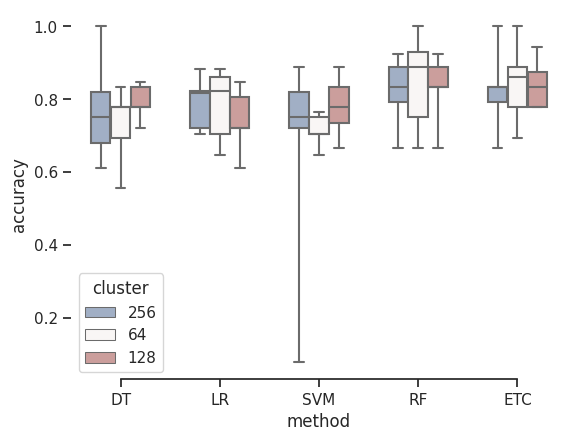

In [15]:
sns.set_theme(style="ticks")
sns.boxplot(x="method", y="accuracy", hue = "cluster", data=sift_dict_df,
            whis=[0, 100], width=0.6, palette="vlag")
sns.despine(trim=True, left=True)

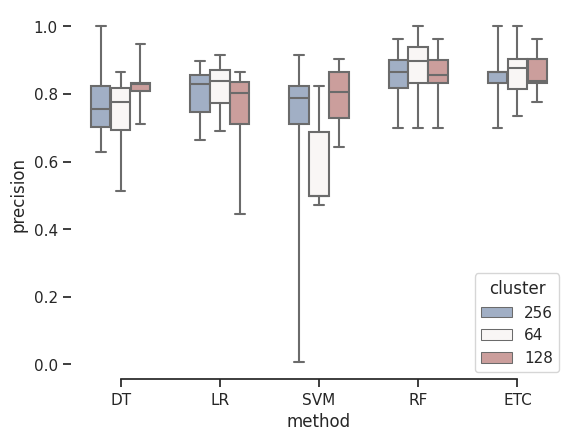

In [16]:
sns.set_theme(style="ticks")
sns.boxplot(x="method", y="precision", hue = "cluster", data=sift_dict_df,
            whis=[0, 100], width=0.6, palette="vlag")
sns.despine(trim=True, left=True)

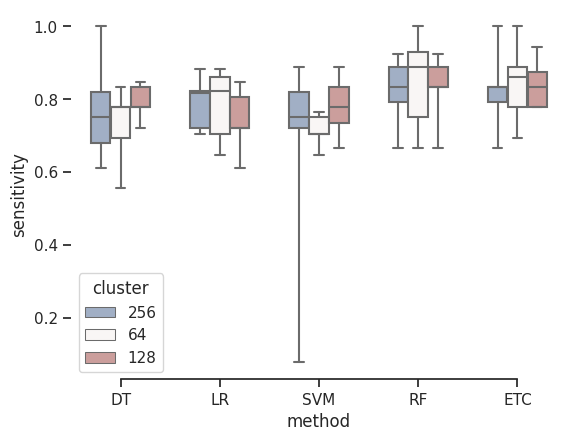

In [17]:
sns.set_theme(style="ticks")
sns.boxplot(x="method", y="sensitivity", hue = "cluster", data=sift_dict_df,
            whis=[0, 100], width=0.6, palette="vlag")
sns.despine(trim=True, left=True)

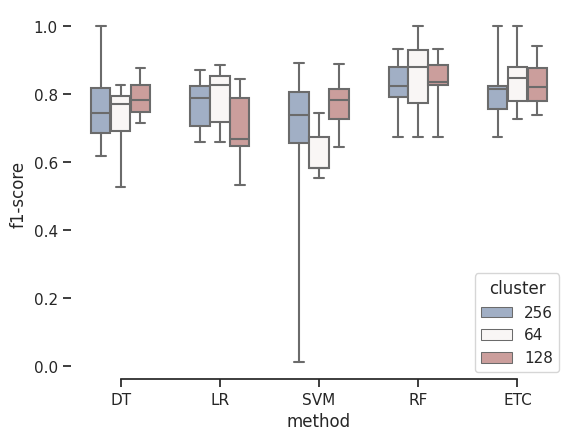

In [18]:
sns.set_theme(style="ticks")
sns.boxplot(x="method", y="f1-score", hue = "cluster", data=sift_dict_df,
            whis=[0, 100], width=0.6, palette="vlag")
sns.despine(trim=True, left=True)

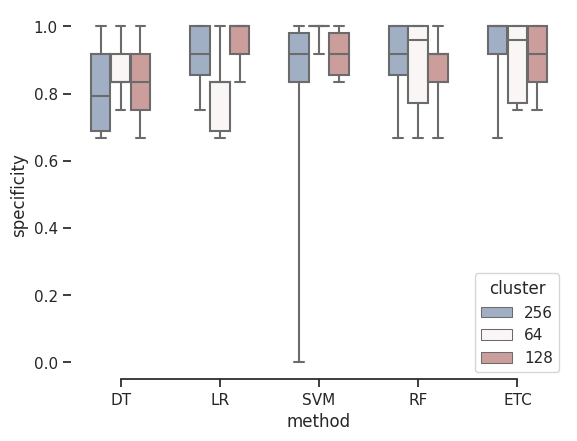

In [19]:
sns.set_theme(style="ticks")
sns.boxplot(x="method", y="specificity", hue = "cluster", data=sift_dict_df,
            whis=[0, 100], width=0.6, palette="vlag")
sns.despine(trim=True, left=True)

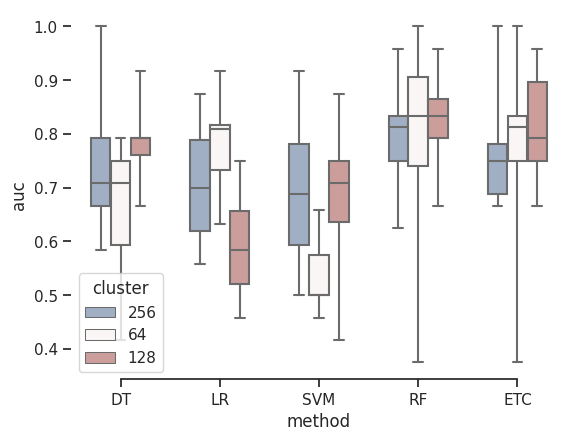

In [20]:
sns.set_theme(style="ticks")
sns.boxplot(x="method", y="auc", hue = "cluster", data=sift_dict_df,
            whis=[0, 100], width=0.6, palette="vlag")
sns.despine(trim=True, left=True)